In [1]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 
%matplotlib inline  

In [2]:

result = pd.read_csv('result_grid_rowfilled.csv')

In [3]:
result[['city','country']] =result['place'].str.split(',',expand=True)
result["city"]= result["city"].replace('Copenhagen Municipality', "Copenhagen") 
result

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids,city,country
0,"Bern, Switzerland",56.493189,86.925789,28.882052,13.217373,5.0,26542.0,1.0,Bern,Switzerland
1,"Bordeaux, France",58.133290,87.091295,28.874464,11.360055,3.0,24112.0,1.0,Bordeaux,France
2,"Bremen, Germany",57.810681,88.116883,28.282081,13.075418,26.0,162398.0,5.0,Bremen,Germany
3,"Utrecht, Netherlands",63.425972,86.149144,24.669134,10.252318,6.0,54351.0,0.0,Utrecht,Netherlands
4,"Strasbourg, France",57.307698,90.365786,21.959662,11.372857,7.0,48624.0,1.0,Strasbourg,France
5,"Amsterdam, Netherlands",60.720090,86.770553,30.311780,9.873068,17.0,106081.0,5.0,Amsterdam,Netherlands
6,"Copenhagen Municipality, Denmark",60.088753,88.157495,21.458609,12.464644,8.0,110264.0,1.0,Copenhagen,Denmark
7,"Innsbruck, Austria",56.045663,83.789288,24.669241,11.400695,1.0,7811.0,0.0,Innsbruck,Austria
8,"Bristol, United Kingdom",53.559462,89.645530,22.604505,9.072857,8.0,83483.0,2.0,Bristol,United Kingdom
9,"Antwerp, Belgium",60.668312,86.748981,25.643001,10.566077,17.0,82070.0,5.0,Antwerp,Belgium


In [4]:
coya =pd.read_csv('coya.csv')
coya

,Unnamed: 0,city,country,total_score,bike_infrastructure,bike_use_percent,road_quality
0,0,Utrecht,Netherlands,77.84,57.51,51.0,60.78
1,1,Munster,Germany,65.93,51.23,39.1,53.05
2,2,Antwerp,Belgium,60.51,34.28,28.9,53.37
3,3,Copenhagen,Denmark,60.46,55.23,29.0,61.60
4,4,Amsterdam,Netherlands,60.24,55.90,32.0,61.71
5,5,Malmo,Sweden,55.88,46.55,30.0,52.40
6,6,Hangzhou,China,52.55,32.72,30.0,35.06
7,7,Bern,Switzerland,48.76,65.10,15.0,65.46
8,8,Bremen,Germany,47.81,59.78,21.0,55.96
9,9,Hannover,Germany,46.70,53.68,19.0,51.51


In [5]:
df = result.merge(coya, on="city", how = 'inner')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop_duplicates(subset=None, inplace=True)
df

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids,city,country_x,country_y,total_score,bike_infrastructure,bike_use_percent,road_quality
0,"Bern, Switzerland",56.493189,86.925789,28.882052,13.217373,5.0,26542.0,1.0,Bern,Switzerland,Switzerland,48.76,65.10,15.0,65.46
1,"Bordeaux, France",58.133290,87.091295,28.874464,11.360055,3.0,24112.0,1.0,Bordeaux,France,France,45.42,60.23,10.0,59.40
2,"Bremen, Germany",57.810681,88.116883,28.282081,13.075418,26.0,162398.0,5.0,Bremen,Germany,Germany,47.81,59.78,21.0,55.96
3,"Utrecht, Netherlands",63.425972,86.149144,24.669134,10.252318,6.0,54351.0,0.0,Utrecht,Netherlands,Netherlands,77.84,57.51,51.0,60.78
4,"Strasbourg, France",57.307698,90.365786,21.959662,11.372857,7.0,48624.0,1.0,Strasbourg,France,France,45.45,56.44,16.0,58.82
5,"Amsterdam, Netherlands",60.720090,86.770553,30.311780,9.873068,17.0,106081.0,5.0,Amsterdam,Netherlands,Netherlands,60.24,55.90,32.0,61.71
6,"Copenhagen Municipality, Denmark",60.088753,88.157495,21.458609,12.464644,8.0,110264.0,1.0,Copenhagen,Denmark,Denmark,60.46,55.23,29.0,61.60
7,"Innsbruck, Austria",56.045663,83.789288,24.669241,11.400695,1.0,7811.0,0.0,Innsbruck,Austria,Austria,43.12,53.81,17.0,56.18
8,"Bristol, United Kingdom",53.559462,89.645530,22.604505,9.072857,8.0,83483.0,2.0,Bristol,United Kingdom,United Kingdom,43.76,40.61,14.0,56.17
9,"Antwerp, Belgium",60.668312,86.748981,25.643001,10.566077,17.0,82070.0,5.0,Antwerp,Belgium,Belgium,60.51,34.28,28.9,53.37


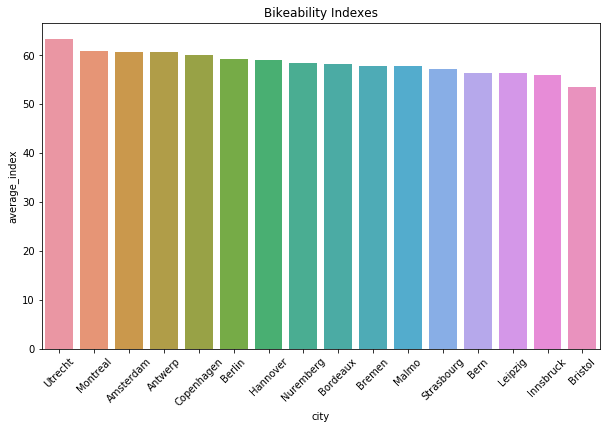

In [6]:
import seaborn as sns
plt.figure(figsize=(10,6))
# make barplot and sort bars
chart =sns.barplot(x='city', y="average_index", data=df, 
            order=df.sort_values('average_index', ascending= False).city)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Bikeability Indexes')
plt.show()


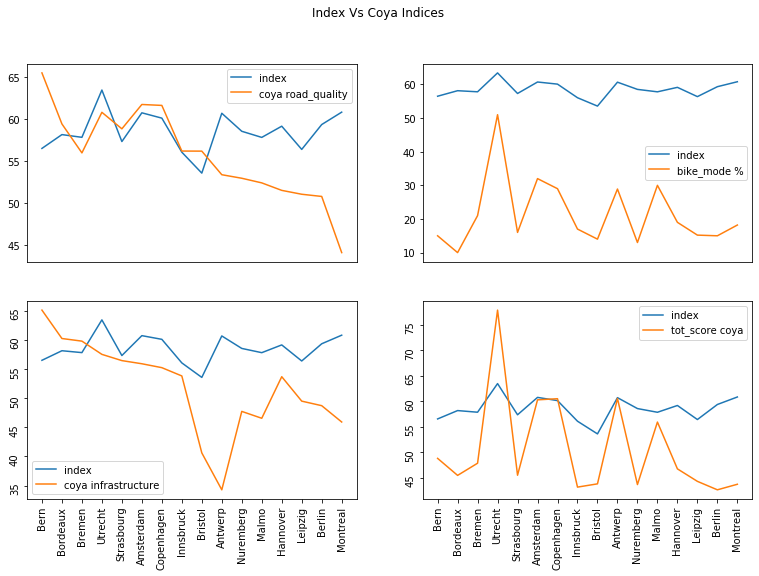

In [7]:
fig, ax = plt.subplots(2,2,figsize=(13,8))
fig.suptitle('Index Vs Coya Indices')
ax[0,0].plot(df['city'], df['average_index'], label = 'index')
ax[0,0].plot(df['city'], df['road_quality'], label = 'coya road_quality')
ax[1,0].plot(df['city'], df['average_index'], label = 'index')
ax[1,0].plot(df['city'], df['bike_infrastructure'], label = 'coya infrastructure')
ax[1,0].legend(loc = 'top right')
ax[0,0].legend(loc = 'top right')
ax[0,0].get_xaxis().set_ticks([])
ax[1,0].tick_params(labelrotation=90)

ax[1,1].plot(df['city'], df['average_index'], label = 'index')
ax[1,1].plot(df['city'], df['total_score'], label = 'tot_score coya')
ax[0,1].plot(df['city'], df['average_index'], label = 'index')
ax[0,1].plot(df['city'], df['bike_use_percent'], label = 'bike_mode %')
ax[1,1].tick_params(labelrotation=90)
ax[0,1].get_xaxis().set_ticks([])
ax[0,1].legend(loc = 'top right')
ax[1,1].legend(loc = 'top right')


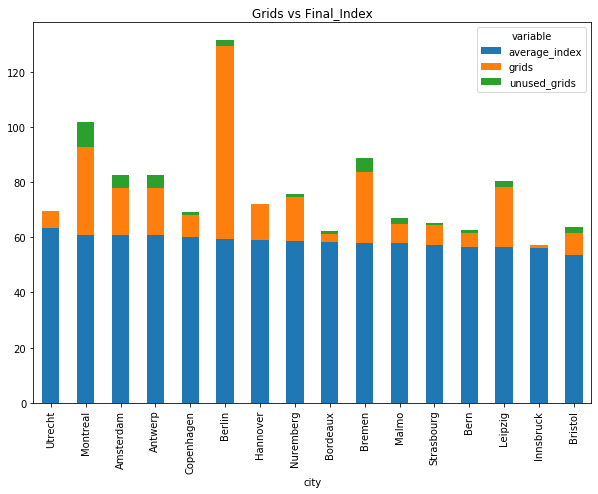

In [8]:
melted =pd.melt(df, id_vars = ['city'], value_vars= ['grids','unused_grids','average_index'])
pivot_df = melted.pivot(index='city', columns='variable', values='value')
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
pivot_df.loc[:,['average_index','grids','unused_grids']].sort_values('average_index', ascending=False).plot.bar(stacked=True, figsize=(10,7),title ='Grids vs Final_Index')